# Gurobi Optimization - Minimizing Total Distance

In [1]:
import gurobipy as gp
from gurobipy import *
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import warnings
import math
import pandas as pd
import random

warnings.filterwarnings("ignore") # To ignore warnings produced

In [2]:
zips_df = pd.read_csv('Zipcode.csv')
# zips_df
zips_df = zips_df.loc[(zips_df['COUNTYNAME'] == 'ALLEGHENY') & (zips_df['population'] > 0)]
zips_df


,OBJECTID,ZIP,NAME,ZIPTYPE,STATE,STATEFIPS,COUNTYFIPS,COUNTYNAME,S3DZIP,LAT,...,MFDU,SFDU,BOXCNT,BIZCNT,RELVER,COLOR,GlobalID,SHAPESTArea,SHAPESTLength,population
0,4,15057,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.361610,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,6738
1,4,15206,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.467710,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,22090
2,4,15214,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.483220,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,12010
3,4,15229,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.517330,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,13410
4,4,15228,BAKERSTOWN,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,150.0,40.368810,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308120,17180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,65824,15047,GREENOCK,PO BOX,PA,42.0,42003.0,ALLEGHENY,150.0,40.609477,...,0.0,1.0,162.0,16.0,1.9.3,15.0,{D0843174-66EC-4E75-82B3-87CF445999DA},7.581705e+06,16838.182670,378
122,65828,15032,CURTISVILLE,PO BOX,PA,42.0,42003.0,ALLEGHENY,150.0,40.382820,...,346.0,4134.0,58.0,472.0,1.9.3,6.0,{DB50227E-70F4-42B6-8520-7459A48CA185},8.121033e+02,124.463622,244
124,65837,15221,PITTSBURGH,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,152.0,40.467750,...,3486.0,12256.0,298.0,826.0,1.9.3,11.0,{FD9F8061-8A24-42E9-B338-E4E0AD2E4902},1.661810e+08,94732.735410,23860
125,65839,15205,PITTSBURGH,NON-UNIQUE,PA,42.0,42003.0,ALLEGHENY,152.0,40.483220,...,1718.0,8997.0,116.0,1222.0,1.9.3,11.0,{0DA8A3EB-2BBC-4D9A-B932-9C9C9BF5E3E3},3.850844e+08,236307.108000,20320


In [3]:
zips = zips_df['ZIP'].to_list()
# zips
all_n = np.array(zips)
# # zips
# np.in1d(POD_zips, all_n)
# 0,1,5,9,10,13,15,16,21,22,24,27,29,36
# POD_zips[[0,1,5,9,10,13,15,16,21,22,24,27,29,36]]

In [4]:
zipcodes_path = 'pittsburgh-allegheny-county.csv'
data = np.genfromtxt(zipcodes_path, dtype=str, delimiter=',', encoding='utf-8-sig')
# neighborhoods = data.astype(np.int)
neighborhoods = all_n.astype(np.int)

POD_sites_path = 'POD Sites.xlsx'
POD_df = pd.read_excel(POD_sites_path)
POD_df = POD_df[['SCHOOL/FACILITY NAME', 'STRIP MAP']]
POD_df['ZIPCODE'] = POD_df['STRIP MAP'].apply(lambda x: str(x)[-5:])
POD_df = POD_df[:47]
POD_df

POD_zips = np.array(pd.to_numeric(POD_df.ZIPCODE).values)
print(POD_zips)
print(neighborhoods)

[15237 15236 15102 15216 15227 15106 15210 15220 15025 15108 15024 15110
 15137 15037 15238 15146 15101 15065 15216 15132 15136 15108 15228 15090
 15229 15202 15235 15214 15044 15206 15217 15239 15056 15139 15209 15133
 15057 15129 15144 15120 15136 15025 15241 15126 15122 15221 15221]
[15057 15206 15214 15229 15228 15108 15101 15146 15037 15024 15108 15106
 15236 15237 15007 15014 15015 15018 15025 15034 15030 15035 15046 15049
 15064 15065 15082 15110 15112 15129 15131 15132 15133 15135 15137 15144
 15148 15203 15211 15213 15224 15225 15232 15239 15275 15006 15051 15223
 15227 16229 15282 15083 15088 15116 15122 15204 15216 15102 15234 15120
 15017 15215 15139 15028 15145 15104 15086 15142 15241 15226 15207 15075
 15076 15209 15243 15136 16046 15056 15045 15090 15084 15147 15235 15238
 15220 15217 15233 15143 15210 15289 15044 15126 15047 15032 15221 15205
 15202]


In [5]:
num_neighborhoods = len(neighborhoods)
num_sites = len(POD_zips)


random.seed(20)

zipcodes_df = pd.read_csv('Zipcode.csv')
# zipcodes_df = zipcodes_df.loc[zipcodes_df['type'].isin(['STANDARD', 'UNIQUE'])]
zipcodes_df = zipcodes_df.loc[(zipcodes_df['population'] > 0)]
zipcodes_df_filtered = zipcodes_df[['ZIP', 'NAME', 'LAT', 'LON', 'population']]


from math import sin, cos, sqrt, atan2, radians

def calcDistBetweenTwoPoints(pt1, pt2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(pt1[0])
    lon1 = radians(pt1[1])
    lat2 = radians(pt2[0])
    lon2 = radians(pt2[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return(distance)
    
def getLatLongFromZip_graph(zipcode, df):
    lat = df.loc[df['ZIP'] == zipcode]['LAT'].values[0]
    long = df.loc[df['ZIP'] == zipcode]['LON'].values[0]
    return((lat, long))

def getLatLongFromZip(zipcode, df):
    lat = df.loc[df['ZIP'] == zipcode]['LAT'].values[0]
    long = df.loc[df['ZIP'] == zipcode]['LON'].values[0]
    return((lat, long))
    
problematic_n = []
problematic_s = []
distances = []
# nomi.query_postal_code()['latitude']
for i in range(num_neighborhoods):
    temp = []
    for j in range(num_sites):
        try:
#             print(POD_zips[j])
            pt1 = getLatLongFromZip(neighborhoods[i], zips_df)
#             pt1 = (nomi.query_postal_code(str(neighborhoods[i]))['latitude'], nomi.query_postal_code(str(neighborhoods[i]))['longitude'])
#             print(pt1)
            pt2 = getLatLongFromZip(POD_zips[j], zips_df)
#             pt2 = (nomi.query_postal_code(str(POD_zips[j]))['latitude'], nomi.query_postal_code(str(POD_zips[j]))['longitude'])
            dist = calcDistBetweenTwoPoints(pt1, pt2)
            temp.append(dist)
        except:
            problematic_n.append(neighborhoods[i])
            problematic_s.append(POD_zips[j])
#             print(neighborhoods[i], POD_zips[j])
            print('-'*50)
            temp.append(1000000)
    distances.append(temp)
distances = np.array(distances)
# distances = np.delete(distances, (12), axis=0)

Text(0.5, 1.0, 'Neighborhoods (blue) vs possible POD sites (red)')

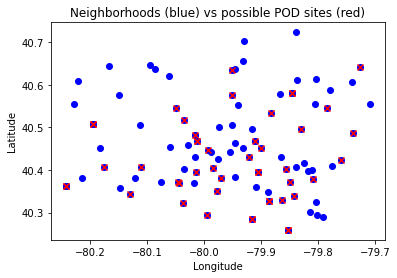

In [6]:
POD_lats = []
POD_longs = []

for z in POD_zips:
    lat, long = getLatLongFromZip_graph(z, zips_df)
    POD_lats.append(lat)
    POD_longs.append(long)
    
neighborhood_lats = []
neighborhood_longs = []

for z in neighborhoods:
    lat, long = getLatLongFromZip_graph(z, zips_df)
    neighborhood_lats.append(lat)
    neighborhood_longs.append(long)

    
plt.scatter(neighborhood_longs, neighborhood_lats, marker='o', c = 'blue')
plt.scatter(POD_longs, POD_lats, marker='x', c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighborhoods (blue) vs possible POD sites (red)')




In [7]:
population = []
for i in range(num_neighborhoods):
    try:
        population.append(zipcodes_df_filtered.loc[zipcodes_df_filtered['ZIP'] == neighborhoods[i]]['population'].values[0])
    except:
        pass

population = np.array(population)
pop_mean = np.mean(population)

#for i in range(len(population)):
#    if(population[i] == 0):
#        population[i] = pop_mean
print(population)

[ 6738 22090 12010 13410 17180 37850 24110 25680  9730  7970 37850 16810
 29410 42230   360  2650  1290   750 15150  1350   850  1770  2360   860
   310  9890   386  3950  2650 10260  7280 14700  5460  4510  8540  3580
  1860  6410  8560  7230  7630   870  6760 20120    13   359   360  6180
 26790  4790    16   900   631 13950 17260  6820 19990 28950 12670 15350
 14880 11150  6080   170  5720  6020   560  1860 22040 11930  8780   207
   810 10970 13340 20030 18170   950  3500 23900  8360 13980 30560 12850
 16460 21290  2120 21220 20140   123 29140  6730   378   244 23860 20320
 17220]


In [8]:
population.shape

(97,)

## Find the minimum cost to vaccinate the entire population

In [67]:
# MODEL INITIALIZATION
m1 = Model()
sizes = range(3)
zipcodes = range(distances.shape[0])
sites = range(distances.shape[1])
days = range(25)

# CONSTANTS
D = distances
p = population
total_pop = population.sum()
e = np.array([72, 85, 100])
o = 20000
v = 50
f = 8000
r = 206.76
h = 12.5
C = 1370

In [10]:
population.sum()/(1370*100)

7.609525547445256

In [11]:
(population.sum() - (1370*100*7))/100

835.05

In [12]:
[population.sum() - 100*i*1370 for i in [1, 2, 3, 4, 5, 6, 7]]

[905505, 768505, 631505, 494505, 357505, 220505, 83505]

In [13]:
o+v*total_pop+r*(7*1370+835.05)+h*sum(total_pop - 100*i*1370 for i in [1, 2, 3, 4, 5, 6, 7]) + f*8

97633920.838

The minimum total cost is $97,633,920.83, found by only utilizing one site.

## Minimize distance while keeping cost at a minimum

In [14]:
print(np.argmin(distances.T@population[ : , np.newaxis]))
print(np.min(distances.T@population[ : , np.newaxis]))

30
14255248.298092108


Minimum total distance given minimum cost (achieved by only using one site): 14,255,248.29

In [15]:
14255248.298092108 / population.sum()

13.6740335040044

Average total distance in this scenario: 13.67

In [16]:
max(distances[:,30])

33.3645020058423

Max distance in this scenario is 33.36

## Minimize Distance without respect to Cost

In [68]:
# DECISION VARIABLES
A = m1.addVars(zipcodes, sites, vtype = GRB.BINARY)
S = m1.addVars(sites, vtype = GRB.BINARY)
M = m1.addVars(sites, vtype = GRB.BINARY)
L = m1.addVars(sites, vtype = GRB.BINARY)
U = m1.addVars(sites, days, vtype = GRB.BINARY)
X = m1.addVars(sites, days)#, vtype = GRB.INTEGER)
I = m1.addVars(sites, days)#, vtype = GRB.INTEGER)

# OBJECTIVE
m1.setObjective(sum(p[i]*D[i,j]*A[i,j] for i in zipcodes for j in sites))
m1.modelSense = GRB.MINIMIZE

# CONSTRAINTS
for i in zipcodes:
    m1.addConstr(sum(A[i,j] for j in sites) == 1)
    
    for j in sites:
        m1.addConstr(A[i,j] <= S[j] + M[j] + L[j])
        m1.addConstr(A[i,j] >= 0)
        
for j in sites:
    assigned_pop = sum(A[i,j] * p[i] for i in zipcodes)
    m1.addConstr(S[j] + M[j] + L[j] <= 1)
    m1.addConstr(sum(e[0]*X[j,t] for t in days) >= assigned_pop - (1-S[j])*total_pop)
    m1.addConstr(sum(e[1]*X[j,t] for t in days) >= assigned_pop - (1-M[j])*total_pop)
    m1.addConstr(sum(e[2]*X[j,t] for t in days) >= assigned_pop)
    m1.addConstr(S[j] >= 0)
    m1.addConstr(M[j] >= 0)
    m1.addConstr(L[j] >= 0)
    
    administered = [0,0,0]
    for t in days:
        administered[0] += e[0]*X[j,t]
        administered[1] += e[1]*X[j,t]
        administered[2] += e[2]*X[j,t]
        m1.addConstr(X[j,t] >= 10*M[j] + 20*L[j] - 20*(1-U[j,t]))
        m1.addConstr(X[j,t] <= 10*S[j] + 20*M[j] + C*L[j]) #The third term is redundant
        m1.addConstr(X[j,t] <= C*U[j,t])
        m1.addConstr(U[j,t] <= S[j] + M[j] + L[j])
        m1.addConstr(I[j,t] + (1-S[j])*total_pop >= assigned_pop - administered[0])
        m1.addConstr(I[j,t] + (1-M[j])*total_pop >= assigned_pop - administered[1])
        m1.addConstr(I[j,t] + (1-L[j])*total_pop >= assigned_pop - administered[2])
        m1.addConstr(I[j,t] - (1-S[j])*total_pop <= assigned_pop - administered[0])
        m1.addConstr(I[j,t] - (1-M[j])*total_pop <= assigned_pop - administered[1])
        m1.addConstr(I[j,t] - (1-L[j])*total_pop <= assigned_pop - administered[2])
        m1.addConstr(X[j,t] >= 0)
        m1.addConstr(I[j,t] >= 0)
        m1.addConstr(U[j,t] >= 0)   
        
for t in days:
    m1.addConstr(sum(X[j,t] for j in sites) <= C)


In [69]:
m1.Params.TimeLimit = 3*60
m1.optimize()

Changed value of parameter TimeLimit to 180.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 24844 rows, 8225 columns and 855682 nonzeros
Model fingerprint: 0xd70ebc30
Variable types: 2350 continuous, 5875 integer (5875 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [5e+01, 2e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve added 0 rows and 705 columns
Presolve removed 7564 rows and 0 columns
Presolve time: 1.78s
Presolved: 17280 rows, 8930 columns, 781158 nonzeros
Variable types: 3055 continuous, 5875 integer (5875 binary)
Found heuristic solution: objective 1.917617e+07
Found heuristic solution: objective 1.482196e+07

Root relaxation: objective 1.080261e+06, 2699 iterations, 0.14 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work


In [70]:
m1.objval

1080260.9752623043

In [71]:
m1.objval / sum(population)

1.0362165891408714

Minimum total distance traveled is 1,080,261

Minimum average distance traveled is 1.04

In [72]:
max([A[i,j].x*D[i,j] for i in zipcodes for j in sites])

14.657912157781494

The maximum distance traveled is 14.66

In [73]:
o*sum((S[j].x + M[j].x + L[j].x) for j in sites) + v*sum(A[i,j].x*p[i] for i in zipcodes for j in sites) + sum(r*X[j,t].x + h*I[j,t].x + f*U[j,t].x for j in sites for t in days)

183625206.11159855

The cost is $183,625,206.11

In [74]:
num_sites = 0
for j in sites:
    if (S[j].x + M[j].x + L[j].x) > 0:
        num_sites += 1
print(num_sites)

45


## Minimizing Cost while holding total distance at minimum

In [128]:
m1.setObjective(o*sum((S[j] + M[j] + L[j]) for j in sites)
            + v*sum(A[i,j]*p[i] for i in zipcodes for j in sites)
            + sum(r*X[j,t] + h*I[j,t] + f*U[j,t] for j in sites for t in days))
m1.addConstr(sum(p[i]*D[i,j]*A[i,j] for i in zipcodes for j in sites) <= 1080260.9752623045)
m1.Params.TimeLimit = 8*60
m1.optimize()

Changed value of parameter TimeLimit to 480.0
   Prev: 120.0  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 24846 rows, 8225 columns and 864682 nonzeros
Model fingerprint: 0xdcbc81c7
Variable types: 2350 continuous, 5875 integer (5875 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+06]
  Objective range  [1e+01, 2e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]

MIP start from previous solve produced solution with objective 9.86825e+07 (0.16s)
Loaded MIP start from previous solve with objective 9.86825e+07

Presolve added 0 rows and 614 columns
Presolve removed 7652 rows and 0 columns
Presolve time: 2.06s
Presolved: 17194 rows, 8839 columns, 771682 nonzeros
Variable types: 3055 continuous, 5784 integer (5784 binary)

Root relaxation: objective 5.512161e+07, 8135 iterations, 1.31 seconds

    Nodes    |    Cu

     0     0 8.0704e+07    0  269 9.8682e+07 8.0704e+07  18.2%     -   20s
     0     0 8.0748e+07    0  269 9.8682e+07 8.0748e+07  18.2%     -   21s
     0     0 8.0760e+07    0  257 9.8682e+07 8.0760e+07  18.2%     -   21s
     0     0 8.0761e+07    0  260 9.8682e+07 8.0761e+07  18.2%     -   21s
     0     0 8.0766e+07    0  261 9.8682e+07 8.0766e+07  18.2%     -   21s
     0     0 8.0768e+07    0  254 9.8682e+07 8.0768e+07  18.2%     -   21s
     0     0 8.0812e+07    0  256 9.8682e+07 8.0812e+07  18.1%     -   21s
     0     0 8.0924e+07    0  257 9.8682e+07 8.0924e+07  18.0%     -   22s
     0     0 8.0930e+07    0  256 9.8682e+07 8.0930e+07  18.0%     -   22s
     0     0 8.0937e+07    0  257 9.8682e+07 8.0937e+07  18.0%     -   22s
     0     0 8.0941e+07    0  258 9.8682e+07 8.0941e+07  18.0%     -   22s
     0     0 8.0949e+07    0  260 9.8682e+07 8.0949e+07  18.0%     -   22s
     0     0 8.0950e+07    0  261 9.8682e+07 8.0950e+07  18.0%     -   22s
     0     0 8.0961e+07  


Cutting planes:
  Gomory: 23
  Cover: 15
  Implied bound: 283
  Projected implied bound: 161
  MIR: 533
  Flow cover: 1254
  GUB cover: 5
  Inf proof: 1
  Zero half: 1
  RLT: 299
  Relax-and-lift: 15

Explored 87179 nodes (6082375 simplex iterations) in 480.16 seconds
Thread count was 12 (of 12 available processors)

Solution count 3: 9.86802e+07 9.8682e+07 9.86825e+07 

Time limit reached
Best objective 9.868022996506e+07, best bound 9.777990678788e+07, gap 0.9124%


In [129]:
m1.objval

98680229.96505867

The minimum total distance is found using a budget of $98,677,054.97

In [130]:
max([A[i,j].x*D[i,j] for i in zipcodes for j in sites])

14.657912157781494

The maximum distance in this strategy is 14.66

In [133]:
num_sites = 0
for j in sites:
    if (S[j].x) > 0:
        num_sites += 1
print(num_sites)

0


In [108]:
for j in sites:
    print("Site:", j+1, '\t', L[j].x, '\t', S[j].x + M[j].x + L[j].x)

Site: 1 	 1.0 	 1.0
Site: 2 	 1.0 	 1.0
Site: 3 	 1.0 	 1.0
Site: 4 	 1.0 	 1.0
Site: 5 	 1.0 	 1.0
Site: 6 	 1.0 	 1.0
Site: 7 	 1.0 	 1.0
Site: 8 	 1.0 	 1.0
Site: 9 	 1.0 	 1.0
Site: 10 	 1.0 	 1.0
Site: 11 	 -0.0 	 -0.0
Site: 12 	 1.0 	 1.0
Site: 13 	 1.0 	 1.0
Site: 14 	 -0.0 	 0.0
Site: 15 	 1.0 	 1.0
Site: 16 	 1.0 	 1.0
Site: 17 	 1.0 	 1.0
Site: 18 	 1.0 	 1.0
Site: 19 	 0.0 	 0.0
Site: 20 	 1.0 	 1.0
Site: 21 	 1.0 	 1.0
Site: 22 	 -0.0 	 -0.0
Site: 23 	 1.0 	 1.0
Site: 24 	 1.0 	 1.0
Site: 25 	 1.0 	 1.0
Site: 26 	 1.0 	 1.0
Site: 27 	 1.0 	 1.0
Site: 28 	 1.0 	 1.0
Site: 29 	 1.0 	 1.0
Site: 30 	 1.0 	 1.0
Site: 31 	 1.0 	 1.0
Site: 32 	 1.0 	 1.0
Site: 33 	 0.0 	 1.0
Site: 34 	 1.0 	 1.0
Site: 35 	 1.0 	 1.0
Site: 36 	 1.0 	 1.0
Site: 37 	 1.0 	 1.0
Site: 38 	 1.0 	 1.0
Site: 39 	 1.0 	 1.0
Site: 40 	 1.0 	 1.0
Site: 41 	 0.0 	 0.0
Site: 42 	 -0.0 	 0.0
Site: 43 	 1.0 	 1.0
Site: 44 	 -0.0 	 -0.0
Site: 45 	 1.0 	 1.0
Site: 46 	 1.0 	 1.0
Site: 47 	 -0.0 	 -0.0


In [109]:
max_ts = []
for j in sites:
    max_t = 0
    for t in days:
        if np.allclose(I[j,t].x,0):
            max_t = t + 1
            max_ts.append(max_t)
            break
            

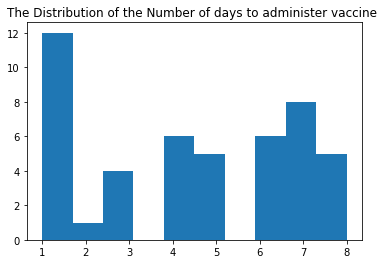

In [110]:
plt.hist(max_ts)
plt.title("The Distribution of the Number of days to administer vaccine ")
plt.show()

In [111]:
days_not_serving = []
days_serving = []
for j in sites:
    num_days = 0
    serve = 0
    for t in days:
        if np.allclose(X[j,t].x, 0) and np.allclose(I[j,t].x, 0) is False:
            num_days += 1
        if np.allclose(X[j,t].x, 0) is False:
            serve +=1 
    days_not_serving.append(num_days)
    days_serving.append(serve)
    

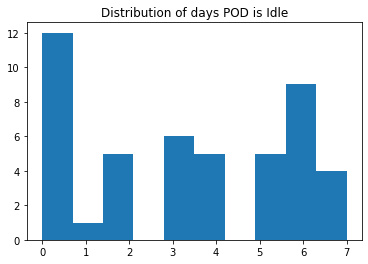

In [112]:
plt.hist(days_not_serving)
plt.title("Distribution of days POD is Idle")
plt.show()

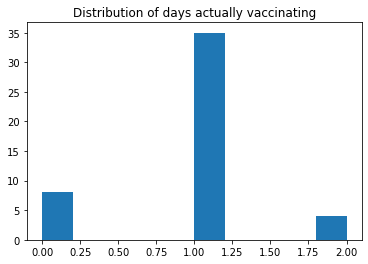

In [113]:
plt.hist(days_serving)
plt.title("Distribution of days actually vaccinating")
plt.show()

In [114]:
arr = np.genfromtxt('Aij_Ben_total_distance.csv', delimiter=",")

In [115]:
arr = arr[:,:47]

In [116]:
utilized = []
not_utilized = []
for j in sites:
    for i in zipcodes:
        if arr[i,j] == 1:
            utilized.append(j)
            break
        if i == len(zipcodes)-1:
            not_utilized.append(j)

In [117]:
utilized = []
not_utilized = []
for j in sites:
    if (S[j].x + M[j].x + L[j].x) > 0:
        utilized.append(j)
    else:
        not_utilized.append(j)

39


Text(0.5, 1.0, 'Neighborhoods (blue) vs optimal POD sites (red)')

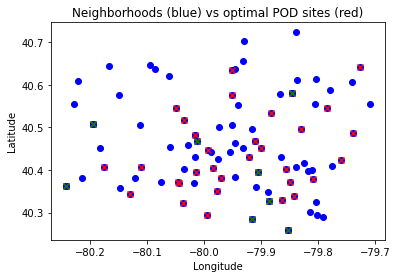

In [118]:
print(num_sites)
plt.scatter(neighborhood_longs, neighborhood_lats, marker='o', c = 'blue')
plt.scatter(np.take(POD_longs, utilized), np.take(POD_lats, utilized), marker='x', c = 'red')
plt.scatter(np.take(POD_longs, not_utilized), np.take(POD_lats, not_utilized), marker='x', c = 'green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighborhoods (blue) vs optimal POD sites (red)')

In [119]:
vaccinations = []
cum_vaccinations = []
cum_vaccinated = 0
for t in days:
    vaccinated = sum(X[j,t].x*(e[0]*S[j].x + e[1]*M[j].x + e[2]*L[j].x) for j in sites)
    cum_vaccinated += vaccinated
    vaccinations.append(vaccinated)
    cum_vaccinations.append(cum_vaccinated)

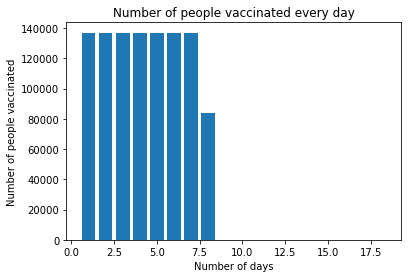

In [120]:
timeline = np.arange(100)+1
plt.bar(timeline[:18], vaccinations[:18])
plt.ylabel("Number of people vaccinated")
plt.xlabel("Number of days")
plt.title("Number of people vaccinated every day")
plt.show()

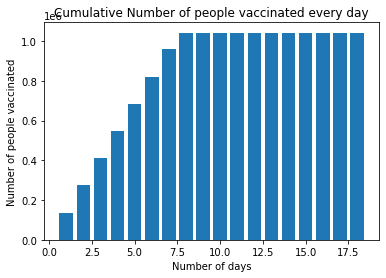

In [121]:
timeline = np.arange(100)+1
plt.bar(timeline[:18], cum_vaccinations[:18])
plt.ylabel("Number of people vaccinated")
plt.xlabel("Number of days")
plt.title("Cumulative Number of people vaccinated every day")
plt.show()

In [122]:
vaccinations

[137000.0,
 137000.0,
 137000.0,
 136999.99999999942,
 136847.00000000073,
 136910.0,
 136984.0,
 83763.99999998738,
 0.0,
 0.0,
 0.0,
 3.1263880373444403e-13,
 0.0,
 0.0,
 0.0,
 3.694822225952518e-13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [123]:
for j in sites:
    print("Site:", j+1, '\t', sum(A[i,j].x*p[i] for i in zipcodes))

Site: 1 	 58890.0
Site: 2 	 29410.0
Site: 3 	 29260.0
Site: 4 	 20890.0
Site: 5 	 27034.0
Site: 6 	 22530.0
Site: 7 	 58570.0
Site: 8 	 16460.0
Site: 9 	 15150.0
Site: 10 	 94538.0
Site: 11 	 0.0
Site: 12 	 3950.0
Site: 13 	 12170.0
Site: 14 	 0.0
Site: 15 	 13776.0
Site: 16 	 46900.0
Site: 17 	 24126.0
Site: 18 	 18560.0
Site: 19 	 0.0
Site: 20 	 26490.0
Site: 21 	 21380.0
Site: 22 	 0.0
Site: 23 	 24000.0
Site: 24 	 31130.0
Site: 25 	 14280.0
Site: 26 	 18030.0
Site: 27 	 36970.0
Site: 28 	 41110.0
Site: 29 	 54500.0
Site: 30 	 55453.0
Site: 31 	 34640.0
Site: 32 	 20120.0
Site: 33 	 950.0
Site: 34 	 23380.0
Site: 35 	 10983.0
Site: 36 	 5460.0
Site: 37 	 13854.0
Site: 38 	 10260.0
Site: 39 	 5850.0
Site: 40 	 15350.0
Site: 41 	 0.0
Site: 42 	 0.0
Site: 43 	 35990.0
Site: 44 	 0.0
Site: 45 	 17260.0
Site: 46 	 32851.0
Site: 47 	 0.0


In [124]:
j = 32
for t in days:
    print(I[j,t].x, '\t', '\t', X[j,t].x)

950.0 	 	 0.0
950.0 	 	 0.0
950.0 	 	 0.0
950.0 	 	 0.0
950.0 	 	 0.0
950.0 	 	 0.0
950.0 	 	 0.0
0.0 	 	 11.176470588235293
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0
0.0 	 	 0.0


In [59]:
# Writing to a csv file

with open('Aij_Ben_total_distance.csv', 'w') as f:
    for i in zipcodes:
        for j in sites:
            f.write(str(A[i,j].x) + ',')
        f.write('\n')
print('Done')

with open('Dij_Ben_total_distance.csv', 'w') as f:
    for i in zipcodes:
        for j in sites:
            f.write(str(D[i,j]) + ',')
        f.write('\n')
print('Done')

Done
Done
